In [143]:
## analyze time usage google sheet

In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   '1OPPbkBkkBJf5_TRd_TWioTfNZtfDlUlQiDoCfRpzdoI' +
                   '/export?gid=0&format=csv'
                  )
test.head(5)  #

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,NaN,07:15,commute,n,NaN
2,NaN,07:30,exercise,n,NaN
3,NaN,08:15,maintenance,n,Trying to get title for my car
4,NaN,09:26,eScience,y,prep lightning talk


In [3]:
# %qtconsole

In [4]:
def cellFillBelow(dataframe, column):
    #loop through cells
    tmp = dataframe[column].copy()
    
    currInfo = tmp[0]
    for ii in range(len(tmp)):
        if pd.isnull(tmp[ii]):
            tmp[ii] = currInfo
        else:
            currInfo = tmp[ii]
    
    return(tmp)

In [5]:
test['day'] = cellFillBelow(test, 'day')

In [6]:
test.head()

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,2 Oct 2017,07:15,commute,n,NaN
2,2 Oct 2017,07:30,exercise,n,NaN
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car
4,2 Oct 2017,09:26,eScience,y,prep lightning talk


In [7]:
test.tail()

,day,hour,category,productive,notes
280,8 Nov 2017,18:00,end,n,NaN
281,9 Nov 2017,10:00,prep bee experiment,n,NaN
282,9 Nov 2017,10:30,paperwork,n,reimbursement
283,9 Nov 2017,11:39,lunch,NaN,NaN
284,9 Nov 2017,12:00,pythonProgram,NaN,NaN


In [8]:
from datetime import datetime

In [9]:
times2 = [datetime.strptime(ii, "%H:%M") for ii in test['hour']]



datetime.strftime(times2[0],"%H:%M" )

'06:00'

In [10]:
timeDiffs = np.diff(times2)

In [11]:
def decimalHours(timedelta):
    duration =timedelta
    seconds = duration.total_seconds()
    hours = seconds / 3600
    return(hours)

timeDiffsHours = [decimalHours(jj) for jj in timeDiffs]
timeDiffsHours.append(0) # add a zero at the end of the dataset
test["timeSpent"] = timeDiffsHours
test.head()

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333


In [12]:
# remove last entry for each day
def removeLastOfDay(dataframe, daycolumn):
    #loop through cells
    tmp = dataframe[daycolumn].copy()
    
    dropRows = []
    for ii in range(len(tmp)):
        try:
            if tmp[ii] != tmp[ii + 1]:
                dropRows.append(ii)
        except:
             dropRows.append(ii)
    
    return(dropRows)

In [13]:
rowRemove = removeLastOfDay(test, "day")

In [14]:
timeCalcs = test.drop(rowRemove)

In [15]:
timeCalcs

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333
5,2 Oct 2017,09:37,maintenance,n,trying to get health insurance cards from UW,0.266667
6,2 Oct 2017,09:53,transition,n,NaN,0.066667
7,2 Oct 2017,09:57,kalmia paper,y,response to reviewers,0.766667
8,2 Oct 2017,10:43,snack,n,NaN,0.200000
9,2 Oct 2017,10:55,kalmia paper,y,NaN,0.200000


In [22]:
# cluster categories
from jellyfish import jaro_distance

words = [ll.lower().rstrip() for ll in timeCalcs.category]
timeCalcs["category"] = words.copy()
def d(coord):
    i, j = coord 
    return (1 - jaro_distance(words[i], words[j]))

ingd = np.triu_indices(len(words), 1)
stff = np.apply_along_axis(d, 0, ingd)

import scipy.cluster.hierarchy

Z = scipy.cluster.hierarchy.linkage(stff)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

scipy.cluster.hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels = np.array(words)
                                  )
plt.savefig("C:\\Users\Combes4\\Desktop\\Hclust.pdf")
plt.show()

# combine clusters
timeCalcs["cluster"] = scipy.cluster.hierarchy.fcluster(Z, 0.5)


timeCalcs["clusterGroup"] = np.zeros(len(timeCalcs))
for ii in np.unique(timeCalcs.cluster):
    clustWords = timeCalcs.category[timeCalcs.cluster == ii]
    pic = np.unique(clustWords)
    clusterGp = ', '.join([''.join(x) for x in pic])
    timeCalcs.loc[timeCalcs.cluster == ii, "clusterGroup"] = clusterGp

ModuleNotFoundError: No module named 'jellyfish'

In [16]:
timeCalcs

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333
5,2 Oct 2017,09:37,maintenance,n,trying to get health insurance cards from UW,0.266667
6,2 Oct 2017,09:53,transition,n,NaN,0.066667
7,2 Oct 2017,09:57,kalmia paper,y,response to reviewers,0.766667
8,2 Oct 2017,10:43,snack,n,NaN,0.200000
9,2 Oct 2017,10:55,kalmia paper,y,NaN,0.200000


In [18]:
g = timeCalcs.groupby('category')['timeSpent'].sum().reset_index(name='sum')

In [19]:
g2 = pd.DataFrame(g).sort_values("sum", ascending=False)
g2.index = range(len(g2))
g2.head()

,category,sum
0,kalmia paper,36.216667
1,Moore/Sloan Summit,23.000000
2,seminar,16.833333
3,Kalmia paper,16.116667
4,wake up,14.000000


In [20]:
import seaborn as sns

In [21]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g2.clusterGroup, np.array(g2["sum"]))
plt.xticks(rotation="vertical")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
np.array(g["sum"])

In [ ]:
len(np.unique(timeCalcs.day))

In [ ]:
g2["sum"].sum()

In [ ]:
g2

In [187]:
nonWorkActivities = ["bike", "snooze", "exercise", "commute", "climbing", "comute", "wake up", "get ready"]

rowRemove = [g2.clusterGroup[ii] not in nonWorkActivities for ii in range(len(g2))]


In [188]:
g3 = g2[rowRemove]

In [189]:
g3["sum"].sum()/len(np.unique(timeCalcs.day))

8.893939393939393

In [190]:
len(timeCalcs)

234

In [192]:
# calculate hours for each day
rowRemove = [timeCalcs.clusterGroup[ii] not in nonWorkActivities for ii in timeCalcs.index]

timecalcs2 =  timeCalcs[rowRemove]

dailyHours= timecalcs2.groupby("day")['timeSpent'].sum().reset_index(name='sum')
dailyHours.sort_values("sum")

,day,sum
0,1 Nov 2017,6.850000
13,25 Oct 2017,8.166667
4,13 Oct 2017,8.250000
3,12 Oct 2017,8.250000
10,20 Oct 2017,8.350000
20,6 Oct 2017,8.500000
7,18 Oct 2017,8.666667
14,26 Oct 2017,8.666667
19,5 Oct 2017,8.750000
9,2 Oct 2017,8.750000


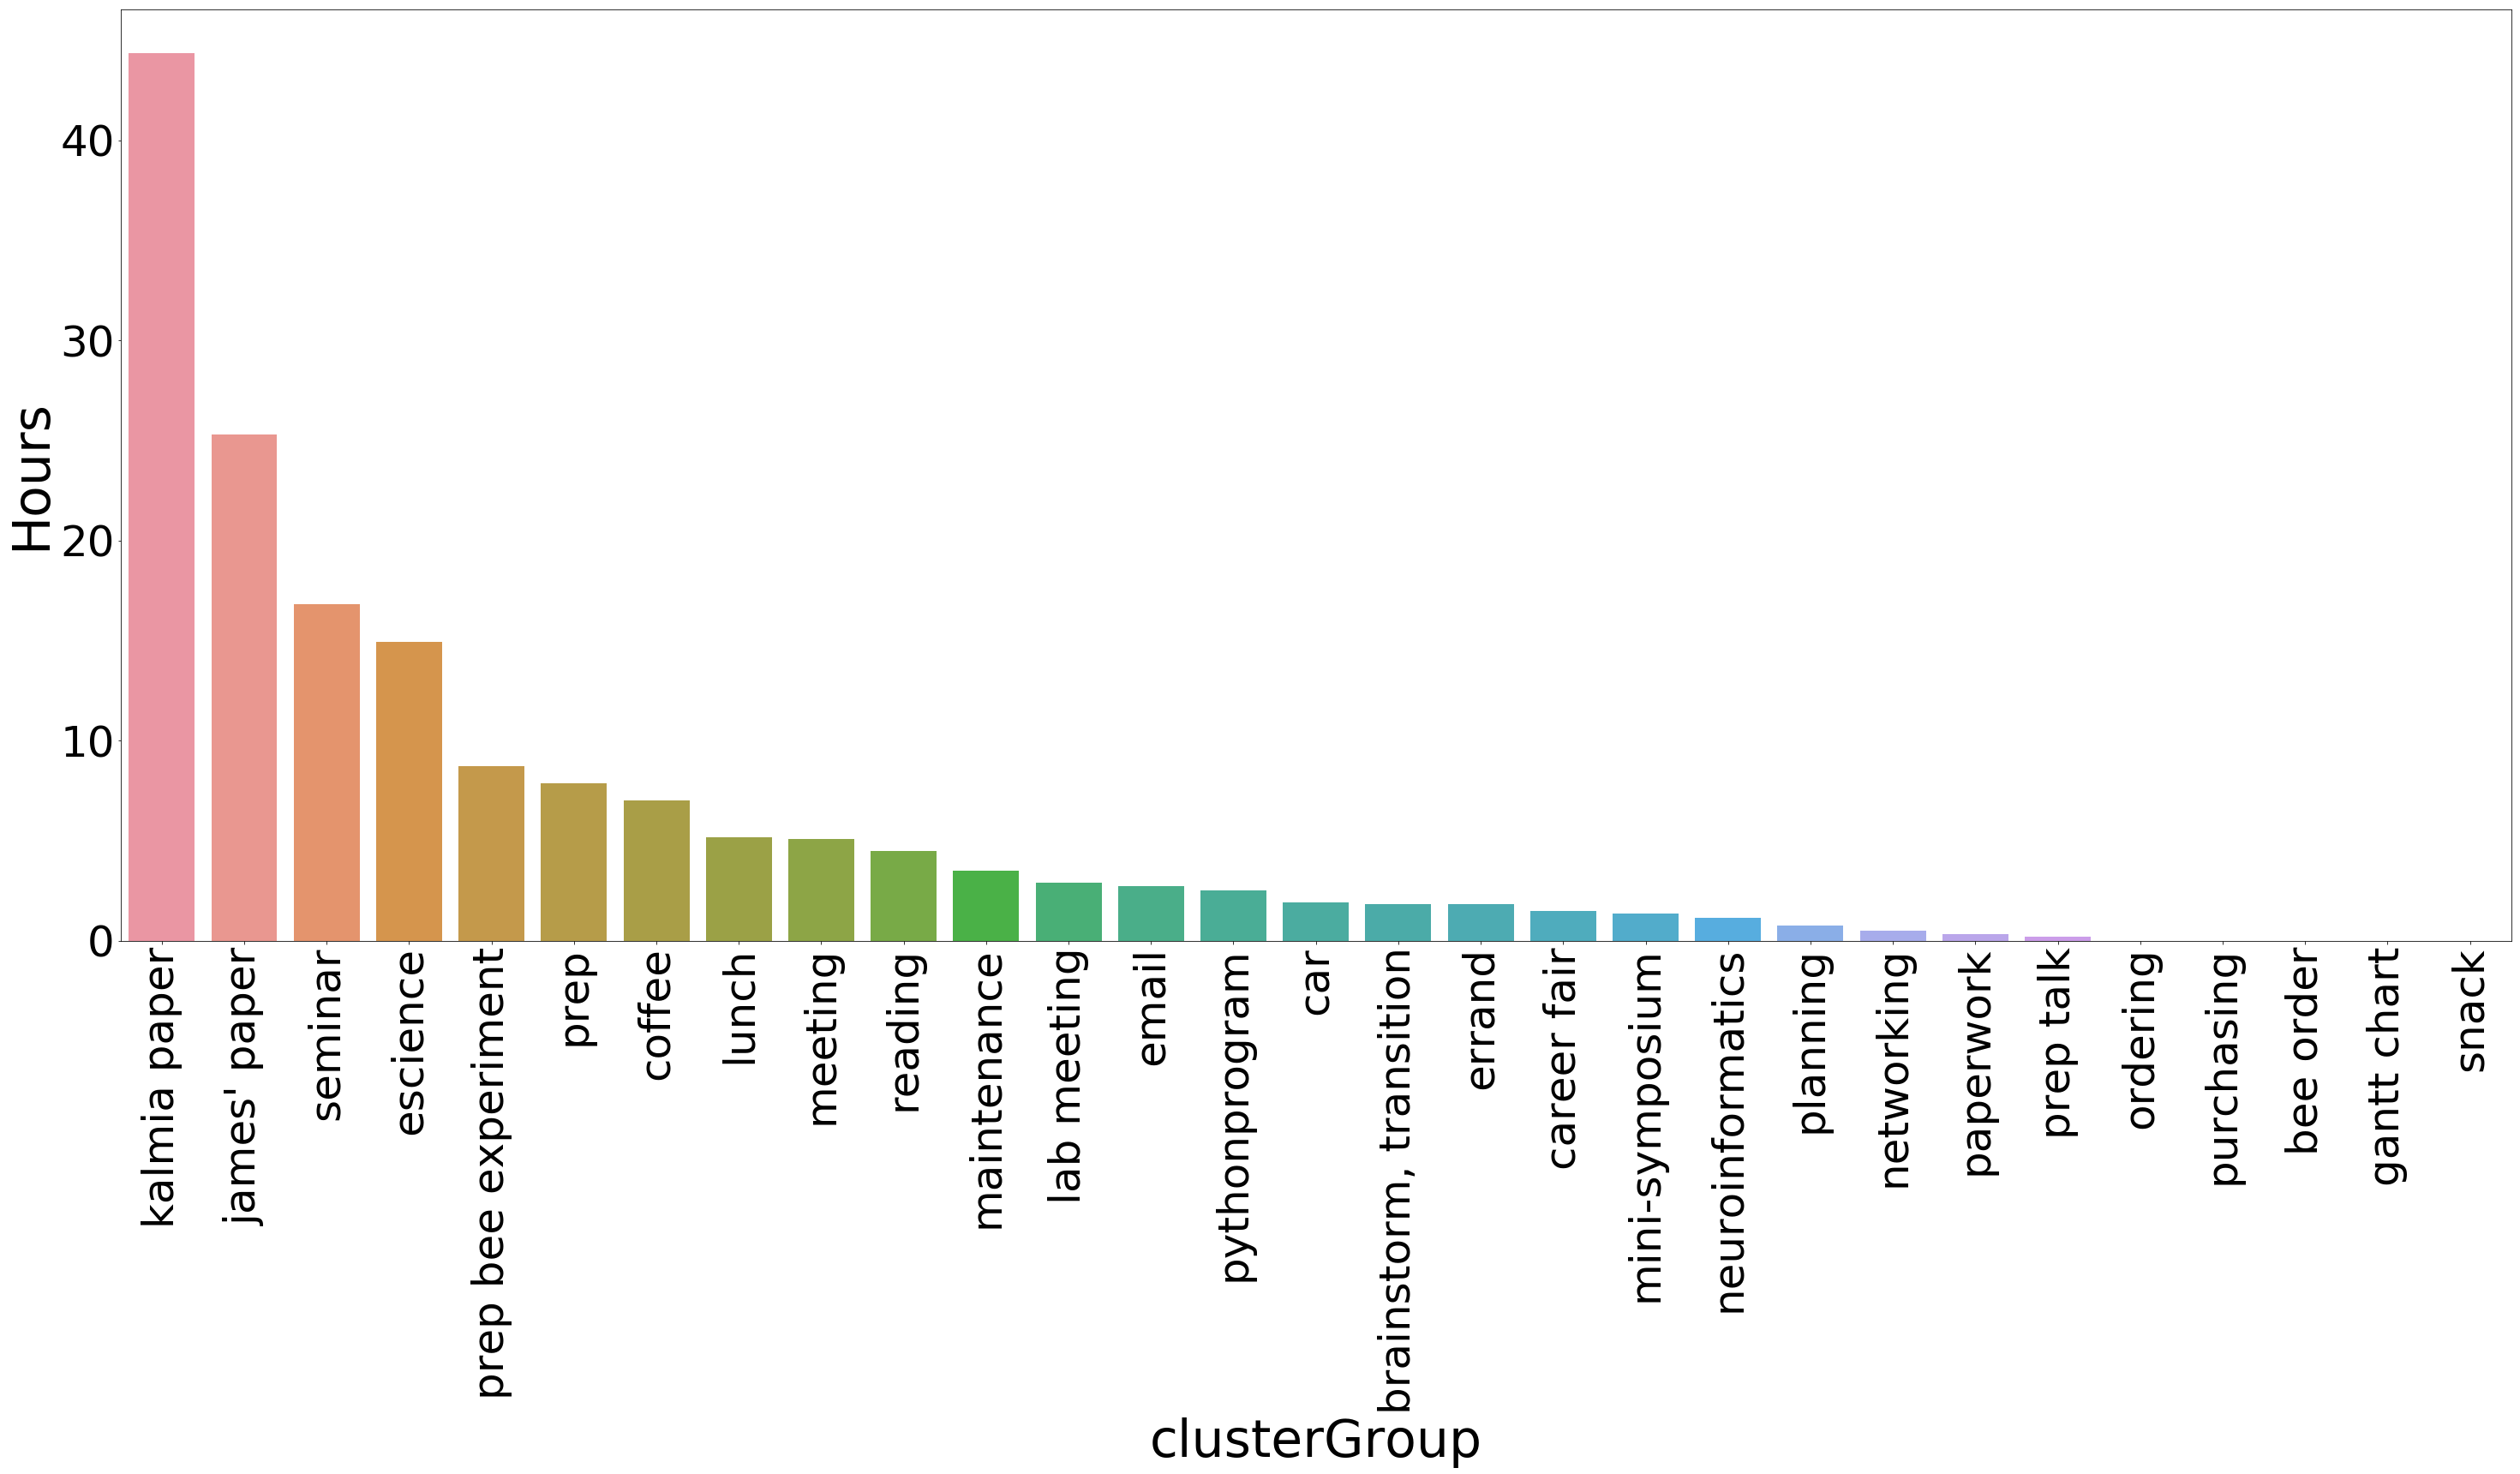

In [193]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g3.clusterGroup, np.array(g3["sum"]))
plt.xticks(rotation="vertical")
plt.show()

In [194]:
g3

,clusterGroup,sum
0,kalmia paper,44.333333
1,james' paper,25.316667
2,seminar,16.833333
3,escience,14.933333
5,prep bee experiment,11.416667
8,prep,8.716667
9,coffee,8.466667
10,lunch,8.233333
11,meeting,7.866667
12,reading,7.000000
